A notebook to get a better understanding of ANOVA.

The simplest case is a one-way ANOVA between two groups. Here we have two sets of data drawn from normal distributions and we want to see of the means are equal.

In [1]:
from scipy import stats

In [42]:
s1 = stats.norm(0,1).rvs(20)
s2 = stats.norm(0.5,1).rvs(20)

In [43]:
stats.f_oneway(s1, s2)

F_onewayResult(statistic=1.8722051514971545, pvalue=0.17925911659467655)

The Kruskal-Wallis test is supposed to handle heteroskedacitic, but is less powerful. That would (I think) imply it has a larger p-value, but that isn't always true.

In [46]:
stats.kruskal(s1, s2)

KruskalResult(statistic=1.6163414634146562, pvalue=0.203602673801352)

(0, 1)

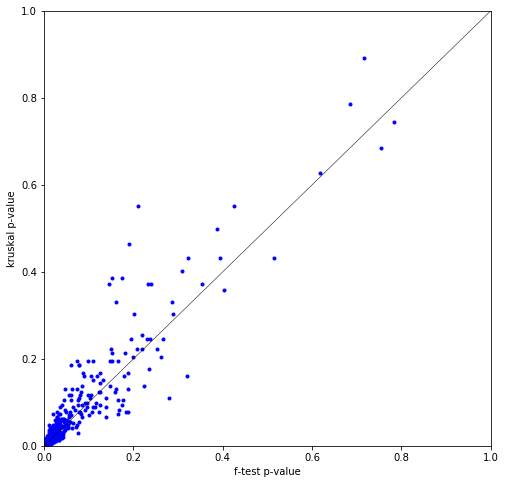

In [77]:
fp = []
kp = []
for _ in range(1000):
    s1 = stats.norm(0,1).rvs(20)
    s2 = stats.norm(1,1).rvs(20)
    fp.append(stats.f_oneway(s1, s2).pvalue)
    kp.append(stats.kruskal(s1, s2).pvalue)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fp, kp, 'b.')
ax.set_xlabel('f-test p-value')
ax.set_ylabel('kruskal p-value')
ax.plot([0, 1], [0, 1], 'k', lw=0.5)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

One doesn't seem more powerful that the other.

Okay, back to ANOVA. The test statistic used with a simple one-way ANOVA is

$$
F = \frac{\text{between-group variability}}{\text{within-group variability}}
$$

Where the first is the (unbiased form of) the variance of the means of the groups (weighted by group size) and the bottom related to the average variance within the groups.

Apparently this simplifies to an t-test with two groups.

(do more calculations here)